In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Dropping Unwanted Columns

In [7]:
data.drop(["Loan_ID","CoapplicantIncome"], axis=1,inplace=True)

In [8]:
data.drop(["Self_Employed","Loan_Amount_Term","Property_Area"], axis=1,inplace=True)

In [9]:
data.isnull().sum()

Gender             13
Married             3
Dependents         15
Education           0
ApplicantIncome     0
LoanAmount         22
Credit_History     50
Loan_Status         0
dtype: int64

In [10]:
data.isnull().sum().sum()

103

In [11]:
data["Gender"].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
data[["Married","Dependents","LoanAmount","Credit_History"]].value_counts()

Married  Dependents  LoanAmount  Credit_History
No       0           120.0       1.0               9
Yes      0           110.0       1.0               6
No       0           110.0       1.0               5
Yes      0           120.0       1.0               5
                     115.0       1.0               4
                                                  ..
No       3+          292.0       1.0               1
                     255.0       1.0               1
                     185.0       1.0               1
                     148.0       1.0               1
Yes      3+          700.0       1.0               1
Length: 401, dtype: int64

In [13]:
data["Gender"].fillna(method="ffill",inplace=True)
data["Married"].fillna(method="bfill",inplace=True)
data["Dependents"].fillna(method="ffill",inplace=True)
data['LoanAmount'].fillna(method='bfill',inplace=True)
data["Credit_History"].fillna(method="ffill",inplace=True)


In [14]:
#data["Gender"].fillna("0",inplace=True)
#data["Married"].fillna("0",inplace=True)
#data["Dependents"].fillna("0",inplace=True)
#data["LoanAmount"].fillna("0",inplace=True)
#data["Credit_History"].fillna("0",inplace=True)

In [15]:
data["Credit_History"].value_counts()

1.0    513
0.0    101
Name: Credit_History, dtype: int64

In [16]:
data.isnull().sum()

Gender             0
Married            0
Dependents         0
Education          0
ApplicantIncome    0
LoanAmount         0
Credit_History     0
Loan_Status        0
dtype: int64

In [17]:
data.head()

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,Male,No,0,Graduate,5849,128.0,1.0,Y
1,Male,Yes,1,Graduate,4583,128.0,1.0,N
2,Male,Yes,0,Graduate,3000,66.0,1.0,Y
3,Male,Yes,0,Not Graduate,2583,120.0,1.0,Y
4,Male,No,0,Graduate,6000,141.0,1.0,Y


In [18]:
data.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [19]:
def salary(income):
    if income<2877:
        return 'low'
    elif income<3812:
        return 'medium'
    else:
        return 'high'

In [20]:
data["ApplicantIncome"]=data["ApplicantIncome"].apply(salary)

In [21]:
data

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,Male,No,0,Graduate,high,128.0,1.0,Y
1,Male,Yes,1,Graduate,high,128.0,1.0,N
2,Male,Yes,0,Graduate,medium,66.0,1.0,Y
3,Male,Yes,0,Not Graduate,low,120.0,1.0,Y
4,Male,No,0,Graduate,high,141.0,1.0,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,medium,71.0,1.0,Y
610,Male,Yes,3+,Graduate,high,40.0,1.0,Y
611,Male,Yes,1,Graduate,high,253.0,1.0,Y
612,Male,Yes,2,Graduate,high,187.0,1.0,Y


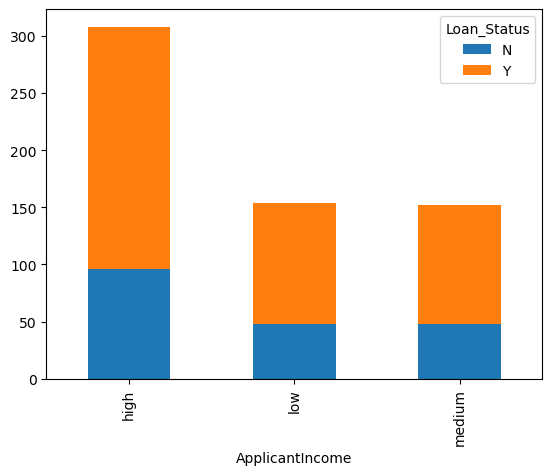

In [22]:
tab=pd.crosstab(data["ApplicantIncome"],data["Loan_Status"])

tab.plot(kind="bar",stacked=True)
plt.show()


In [23]:
print(tab)

Loan_Status       N    Y
ApplicantIncome         
high             96  212
low              48  106
medium           48  104


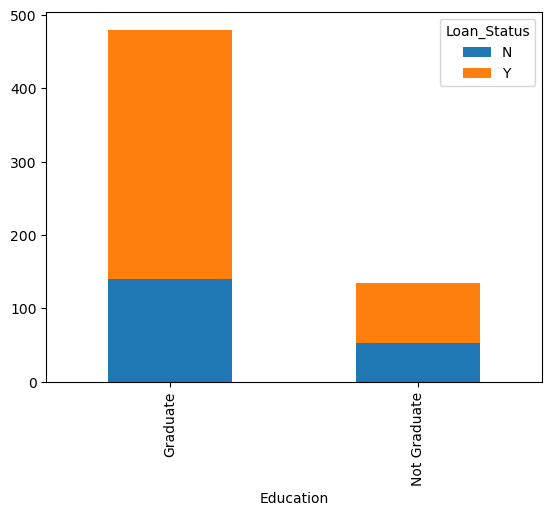

In [24]:
tab=pd.crosstab(data["Education"],data["Loan_Status"])

tab.plot(kind="bar",stacked=True)
plt.show()


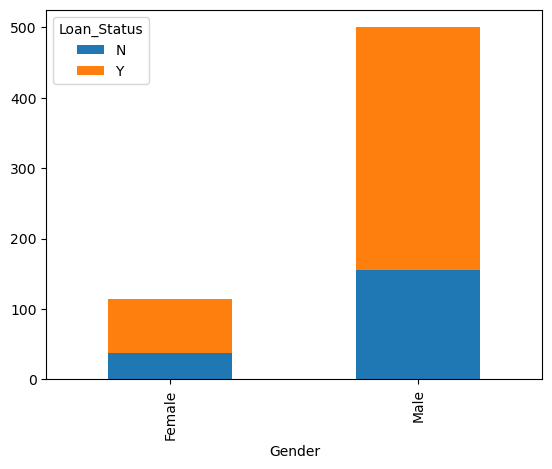

Loan_Status    N    Y
Gender               
Female        37   77
Male         155  345


In [25]:
tab_gender=pd.crosstab(data["Gender"],data["Loan_Status"])

tab_gender.plot(kind="bar",stacked=True)
plt.show()
print(tab_gender)

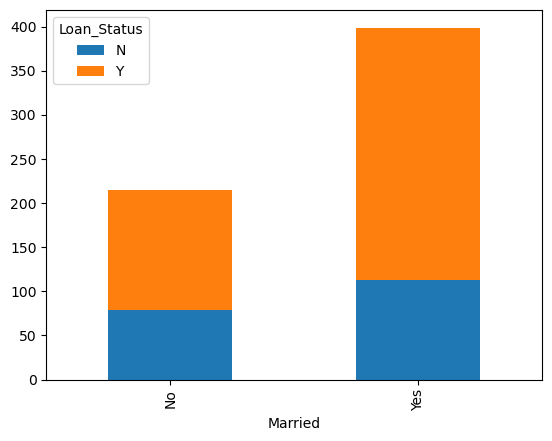

Loan_Status    N    Y
Married              
No            79  136
Yes          113  286


In [26]:
tab=pd.crosstab(data["Married"],data["Loan_Status"])

tab.plot(kind="bar",stacked=True)
plt.show()
print(tab)


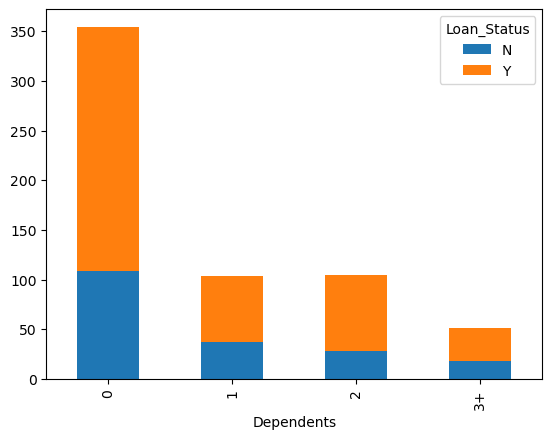

Loan_Status    N    Y
Dependents           
0            109  245
1             37   67
2             28   77
3+            18   33


In [27]:
tab=pd.crosstab(data["Dependents"],data["Loan_Status"])

tab.plot(kind="bar",stacked=True)
plt.show()
print(tab)

In [28]:
data.LoanAmount.describe()

count    614.000000
mean     146.416938
std       84.917398
min        9.000000
25%      100.000000
50%      128.000000
75%      166.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [29]:
def loan(amount):
    if amount<100:
        return 'low'
    elif amount<128:
        return 'medium'
    else:
        return 'high'

In [30]:
data["LoanAmount"]=data["LoanAmount"].apply(loan)

In [31]:
tab=pd.crosstab(data["LoanAmount"],data["Loan_Status"])
print(tab)

Loan_Status    N    Y
LoanAmount           
high         102  211
low           45   97
medium        45  114


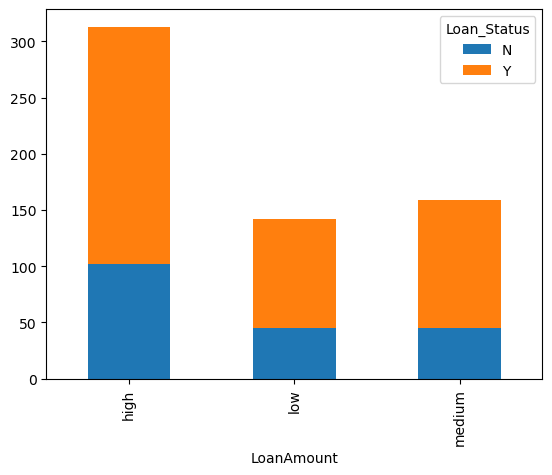

In [32]:
tab.plot(kind="bar",stacked=True)
plt.show()

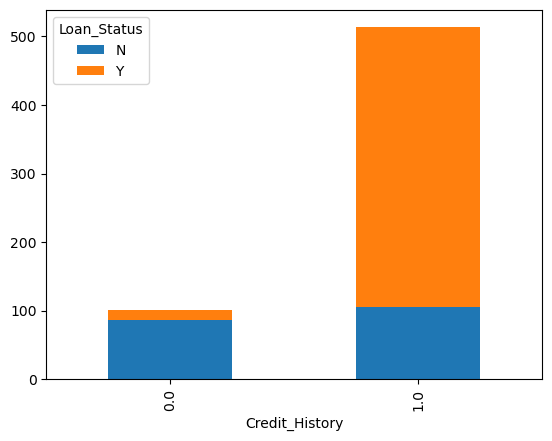

Loan_Status       N    Y
Credit_History          
0.0              87   14
1.0             105  408


In [33]:
tab=pd.crosstab(data["Credit_History"],data["Loan_Status"])

tab.plot(kind="bar",stacked=True)
plt.show()
print(tab)

In [34]:
#data = data.replace(["Male", 1], ["Female", 0])

In [35]:
data

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,Male,No,0,Graduate,high,high,1.0,Y
1,Male,Yes,1,Graduate,high,high,1.0,N
2,Male,Yes,0,Graduate,medium,low,1.0,Y
3,Male,Yes,0,Not Graduate,low,medium,1.0,Y
4,Male,No,0,Graduate,high,high,1.0,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,medium,low,1.0,Y
610,Male,Yes,3+,Graduate,high,low,1.0,Y
611,Male,Yes,1,Graduate,high,high,1.0,Y
612,Male,Yes,2,Graduate,high,high,1.0,Y


In [36]:
data["Gender"].replace({"Male":1,"Female":0},inplace=True)

In [37]:
data["Married"].replace({"Yes":1,"No":0},inplace=True)

In [38]:
data["Education"].replace({"Graduate":1,"Not Graduate":0},inplace=True)

In [39]:
data["ApplicantIncome"].replace({"low":1,"medium":2,"high":3},inplace=True)

In [40]:
data["LoanAmount"].replace({"low":1,"medium":2,"high":3},inplace=True)

In [41]:
data["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)

In [42]:
data["Married"].replace({"Yes":1,"No":0},inplace=True)

In [43]:
data["Credit_History"]=data["Credit_History"].astype(int)

In [44]:
data

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,1,0,0,1,3,3,1,Y
1,1,1,1,1,3,3,1,N
2,1,1,0,1,2,1,1,Y
3,1,1,0,0,1,2,1,Y
4,1,0,0,1,3,3,1,Y
...,...,...,...,...,...,...,...,...
609,0,0,0,1,2,1,1,Y
610,1,1,3,1,3,1,1,Y
611,1,1,1,1,3,3,1,Y
612,1,1,2,1,3,3,1,Y


In [45]:
data.dtypes

Gender              int64
Married             int64
Dependents          int64
Education           int64
ApplicantIncome     int64
LoanAmount          int64
Credit_History      int32
Loan_Status        object
dtype: object

In [46]:
Y=data.Loan_Status

In [47]:
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [48]:
X=data.drop("Loan_Status",axis=1)

In [49]:
X

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History
0,1,0,0,1,3,3,1
1,1,1,1,1,3,3,1
2,1,1,0,1,2,1,1
3,1,1,0,0,1,2,1
4,1,0,0,1,3,3,1
...,...,...,...,...,...,...,...
609,0,0,0,1,2,1,1
610,1,1,3,1,3,1,1
611,1,1,1,1,3,3,1
612,1,1,2,1,3,3,1


## split data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model=LogisticRegression()

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(429, 7)
(185, 7)
(429,)
(185,)


In [55]:
model.fit(X_train,Y_train)

LogisticRegression()

In [56]:
y_pred=model.predict(X_test)

In [57]:
y_pred

array(['N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [58]:
model.score(X_train,Y_train) 

0.8158508158508159

In [59]:
model.score(X_test,Y_test)

0.7837837837837838

In [60]:
new_df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [61]:
new_df

,Actual,Predicted
79,Y,N
410,N,Y
302,Y,Y
450,N,N
582,Y,Y
...,...,...
260,Y,Y
197,Y,Y
162,N,N
554,N,N


## accuracy_score

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(Y_test, y_pred)

0.7837837837837838

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
p=confusion_matrix(Y_test, y_pred)

In [66]:
p

array([[ 32,  36],
       [  4, 113]], dtype=int64)

In [67]:
from sklearn.metrics import plot_confusion_matrix

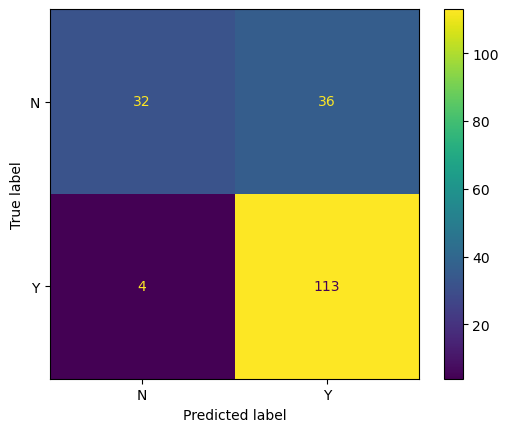

In [68]:
plot_confusion_matrix(model,X_test,Y_test)
plt.show()

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           N       0.89      0.47      0.62        68
           Y       0.76      0.97      0.85       117

    accuracy                           0.78       185
   macro avg       0.82      0.72      0.73       185
weighted avg       0.81      0.78      0.76       185

